# Linear Regression

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
"""
Aerial Bombing Operations of World War Two dataset 
and recalling that the D-Day landings were nearly postponed due to poor weather
"""
dataset = pd.read_csv('D:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\Summary of Weather.csv')

In [7]:
#explore the data a little bit by checking the number of rows and columns in our datasets.
print(dataset.shape)

(119040, 31)


In [8]:
#statistical details of the dataset
dataset.describe()

STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.000000   
25%        20.555556      43.000000       4.000000       8.000000   11.000000   
50%        25.555556      44.000000       7.000000      16.000000   32.000000   
75%        27.222222      45.000000      10.000000      23.000000   34.000000   
max        40.000000      45.000000      12.000000      31.000000   78.000000   

              SPD  ...   FT   FB  FTI  ITH         PGT  SD3  RHX  RHN  RVG  \
count  532.000000  ...  0.0  0.0  0.0  0.0  525.000000  0.0  0.0  0.0  0.0   
mean    20.396617  ...  NaN  NaN  NaN  NaN   12.085333  NaN  NaN  NaN  NaN   
std      5.560371  ...  NaN  NaN  NaN  NaN    5.731328  NaN  NaN  NaN  NaN   
min     10.000000  ...  NaN  NaN  NaN  NaN    0.000000  NaN  NaN  NaN  NaN   
25%     16.000000  ...  NaN  NaN  NaN  NaN    8.500000  NaN  NaN  NaN  NaN   
50%     20.000000  ...  NaN  NaN  NaN  NaN   11.600000  NaN  NaN  NaN  NaN   
75%     23.250000  ...  NaN  NaN  NaN  NaN   15.000000  NaN  NaN  NaN  NaN   
max     41.000000  ...  NaN  NaN  NaN  NaN   23.900000  NaN  NaN  NaN  NaN   

       WTE  
count  0.0  
mean   NaN  
std    NaN  
min    NaN  
25%    NaN  
50%    NaN  
75%    NaN  
max    NaN  

[8 rows x 24 columns]

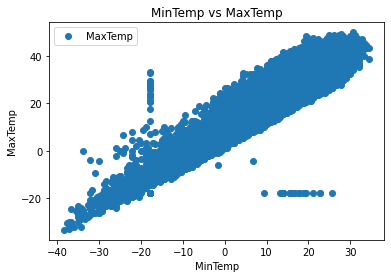

In [9]:
#plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data
ataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [10]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

The test_size variable is where we actually specify the proportion of the test set.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.

In [13]:
#To retrieve the intercept:y=mx+c
print(regressor.intercept_)  #M

#For retrieving the slope:
print(regressor.coef_) #c

[10.66185201]
[[0.92033997]]


This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%

it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 

In [14]:
y_pred = regressor.predict(X_test)

In [16]:
#Now compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

          Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]


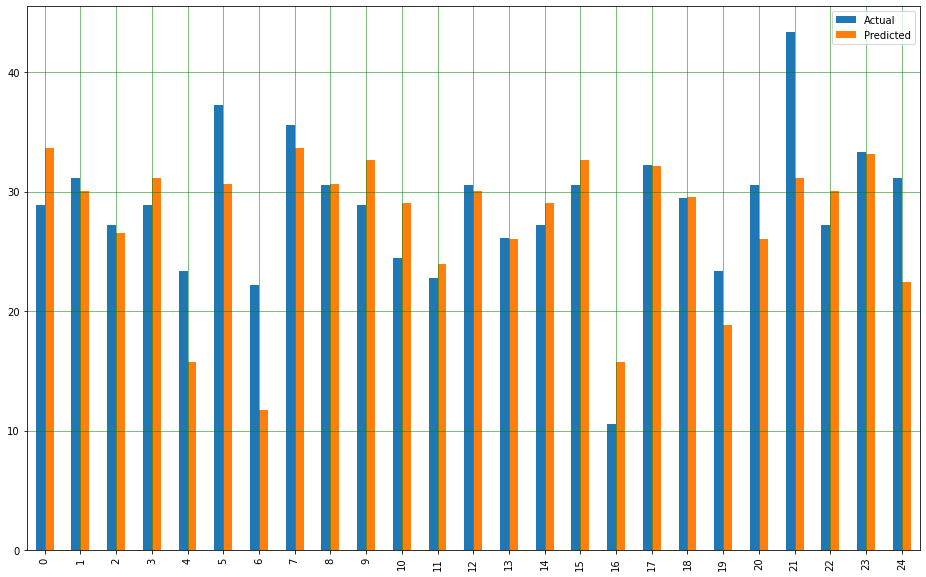

In [17]:
# visualize comparison result as a bar graph
#Note: As the number of records is huge, for representation purpose I’m taking just 25 records.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

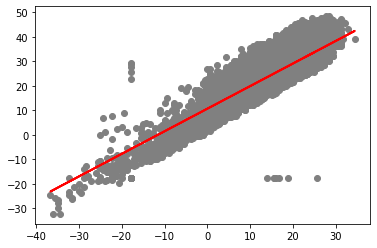

In [18]:
#plot our straight line with the test data 
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [19]:
#The final step is to evaluate the performance of the algorithm.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785973
Mean Squared Error: 17.631568097568557
Root Mean Squared Error: 4.198996082109217


You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.